# Exploratory Data Analysis 
### a) Build data profile table and plots i) Outliers and Anamolies
### b) Explore data relationships
### c) Identificationand creation of features

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

# cntl ? makes something a comment
# esc - shift R enter runs all above
#esc cmd shift R runs all cells
# esc 1, 2, 3, 4, 5 makes something a kind of header
# esc X cuts a cell

In [2]:
os.getcwd()

'/home/vizziwo/capcookie/notebooks'

In [3]:
df = pd.read_csv('/home/vizziwo/capcookie/data/processed/fatalwrangling.csv', index_col=0)
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


# Should I have dropped the 'id' column in Wrangling? Does it matter?

In [4]:
df.drop(columns='id', inplace=True)

In [5]:
df.head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


## Hist of ages of those killed

Text(0, 0.5, 'Number Killed')

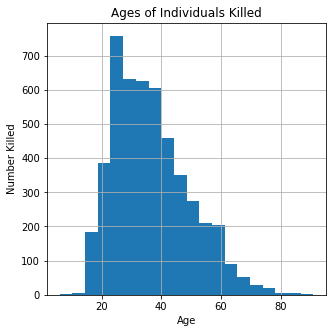

In [6]:
df.age.hist(bins=20, figsize=(5,5))
plt.title('Ages of Individuals Killed')
plt.xlabel('Age')
plt.ylabel('Number Killed')

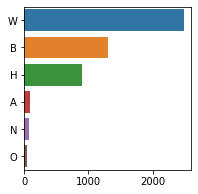

In [7]:
#Visualize races
f, ax = plt.subplots(figsize = (3,3))
killed_by_police = pd.DataFrame(df.race.value_counts())
races = list(killed_by_police.index)
values = list(killed_by_police.race)
sns.barplot(x=values, y=races)

## Some argue that numbers of people by race alone don't tell the story. Maybe we should look at deaths as compared to national population.

In [8]:
# I used Census pop estimates from 2019 https://www.census.gov/data/tables/time-series/demo/popest/2010s-national-detail.html
Census_pop_counts_today = pd.DataFrame([250522190, 44075086, 60572237 , 19504862, 4188092, 9949293],['W','B','H','A','N','O'],columns=['US_pop'])

In [9]:
z = pd.concat([killed_by_police, Census_pop_counts_today], axis=1)
z.columns = ['killed_by_police', 'US_pop']
z['deaths_per_cap'] = z.killed_by_police / z.US_pop
z

,killed_by_police,US_pop,deaths_per_cap
W,2479,250522190,0.000010
B,1298,44075086,0.000029
H,904,60572237,0.000015
A,93,19504862,0.000005
N,78,4188092,0.000019
O,48,9949293,0.000005


Text(0, 0.5, 'Deaths Per Capita')

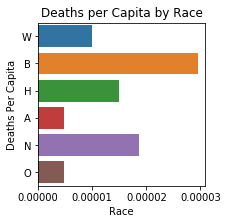

In [10]:
#Visualize races
f, ax = plt.subplots(figsize = (3,3))
races = list(z.index)
values = list(z.deaths_per_cap)
sns.barplot(x=values, y=races)
plt.title('Deaths per Capita by Race')
plt.xlabel('Race')
plt.ylabel('Deaths Per Capita')

## Hist of those killed by state.

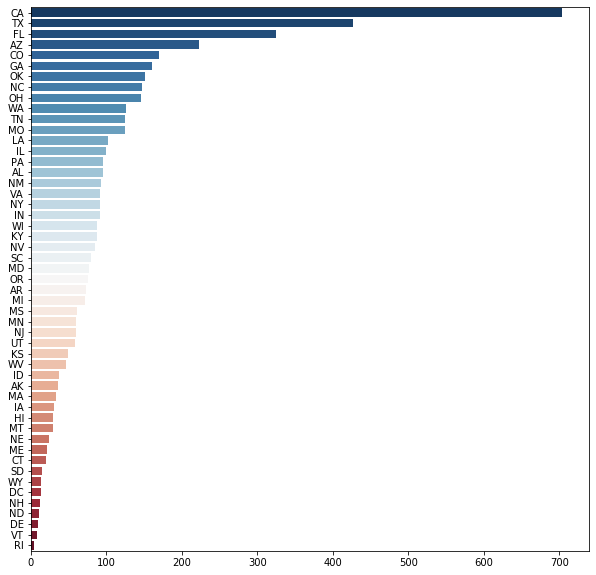

In [11]:
# Now do the same for states! 
f, ax = plt.subplots(figsize=(10,10))
y = pd.DataFrame(df.state.value_counts())
states = list(y.index)
values = list(y.state)
sns.barplot(x=values,y=states, palette="RdBu_r")

### What are the race value counts in CA are, since so many deaths happened there.

In [12]:
df[df.state=='CA'].race.value_counts()

H    318
W    221
B    123
A     29
O      9
N      4
Name: race, dtype: int64

### Now I'm curious how the races of folks killed in cities with less deaths compares to those in cities with more deaths.

In [13]:
df.city.value_counts().head(60)

Los Angeles         78
Phoenix             66
Houston             51
Las Vegas           41
San Antonio         40
Chicago             38
Columbus            36
Albuquerque         32
Jacksonville        31
Oklahoma City       30
St. Louis           30
Austin              29
Kansas City         29
Miami               26
Denver              24
Tucson              23
Louisville          23
Bakersfield         22
Tulsa               21
Atlanta             21
New York            21
Mesa                20
Orlando             20
Baltimore           19
Indianapolis        18
Portland            18
Fresno              18
Long Beach          17
Pueblo              16
Philadelphia        16
Charlotte           16
Colorado Springs    16
Washington          15
Springfield         15
San Diego           15
Arlington           15
San Francisco       15
Memphis             15
Aurora              15
San Jose            15
San Bernardino      14
Dallas              14
Milwaukee           14
Salt Lake C

In [14]:
# Cities will less than 12 deaths.
df.city.value_counts()[df.city.value_counts() < 12].head()

Wichita        11
Omaha          11
Baton Rouge    11
Richmond       11
Reno           11
Name: city, dtype: int64

In [15]:
# How many people were killed in cities with less than 12 deaths? 3750 out of 4500!!!

df.city.value_counts()[df.city.value_counts() < 12].sum()

3745

### Making a dataframe so I can see the racial makeup of victims in low-death cities

In [16]:
cities = pd.Series(df.city.value_counts()[df.city.value_counts() < 12].index)
df.merge(cities.rename('new'), left_on='city', right_on='new').race.value_counts()

W    2123
B     878
H     584
N      65
A      59
O      36
Name: race, dtype: int64

### Doing the same for higher-death cities

In [17]:
bigcities = pd.Series(df.city.value_counts()[df.city.value_counts() >= 12].index)
df.merge(bigcities.rename('new'), left_on='city', right_on='new').race.value_counts()

B    420
W    356
H    320
A     34
N     13
O     12
Name: race, dtype: int64

## This is an interesting distinction: cities with less police killings see more white victims. Cities with more police killings see more black and hispanic killings

### I'm going to graph 'black' deaths against 'total deaths'

In [18]:
x = df.groupby('city')['name'].count()

In [19]:
y = pd.DataFrame(df.groupby('city')['race'].value_counts())

In [20]:
y.columns = ['value']

In [21]:
y

value
city       race       
Abbeville  B         1
Aberdeen   W         2
Abilene    W         2
           B         1
Abingdon   H         1
...                ...
Yuma       H         2
           W         1
Zanesville W         1
Zion       B         1
           W         1

[2891 rows x 1 columns]

In [22]:
y = y.unstack()

In [23]:
y

value                       
race                  A    B    H   N   O    W
city                                          
Abbeville           NaN  1.0  NaN NaN NaN  NaN
Aberdeen            NaN  NaN  NaN NaN NaN  2.0
Abilene             NaN  1.0  NaN NaN NaN  2.0
Abingdon            NaN  NaN  1.0 NaN NaN  1.0
Abington Township   NaN  NaN  1.0 NaN NaN  NaN
...                 ...  ...  ...  ..  ..  ...
Yucca Valley        NaN  NaN  1.0 NaN NaN  1.0
Yulee               NaN  1.0  NaN NaN NaN  1.0
Yuma                NaN  NaN  2.0 NaN NaN  1.0
Zanesville          NaN  NaN  NaN NaN NaN  1.0
Zion                NaN  1.0  NaN NaN NaN  1.0

[2290 rows x 6 columns]

In [24]:
y = y.astype('str').apply(lambda x: x.replace('nan','0'))

In [25]:
y = y.astype('float')

In [26]:
y.columns = y.columns.droplevel(0)

In [27]:
y['total'] = y.A + y.B + y.H + y.N + y.O + y.W

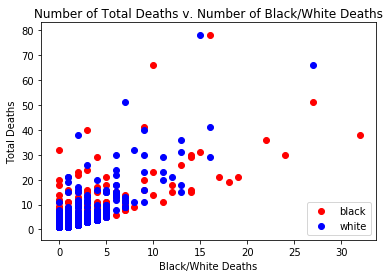

In [28]:
plt.scatter('B', 'total', data=y, color='red', label='black')

plt.scatter('W', 'total', data=y, color='blue', label='white')

plt.title('Number of Total Deaths v. Number of Black/White Deaths')
plt.xlabel('Black/White Deaths')
plt.ylabel('Total Deaths')
plt.legend(loc='lower right')

### Actually doesn't look much different in distributions. Black deaths and white deaths both trend upwards with increasing police-caused deaths in a city

In [29]:
# Plotting histograms of categorical variables.

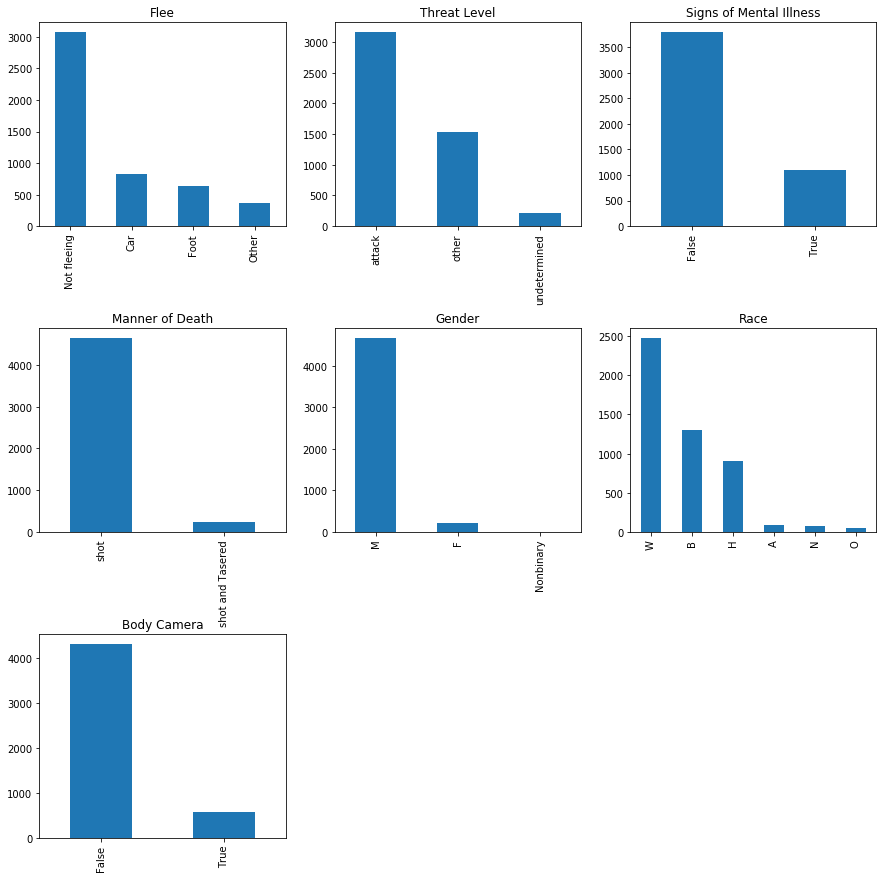

In [30]:
fig = plt.figure(figsize=(15,15))
fig.add_subplot(331)   
df.flee.value_counts().plot(kind='bar')
plt.gca().set_title('Flee')

fig.add_subplot(332)   
df.threat_level.value_counts().plot(kind='bar')
plt.gca().set_title('Threat Level')


fig.add_subplot(333)   
df.signs_of_mental_illness.value_counts().plot(kind='bar')
plt.gca().set_title('Signs of Mental Illness')

fig.add_subplot(334)   
df.manner_of_death.value_counts().plot(kind='bar')
plt.gca().set_title('Manner of Death')

fig.add_subplot(335)   
df.gender.value_counts().plot(kind='bar')
plt.gca().set_title('Gender')

fig.add_subplot(336)  
df.race.value_counts().plot(kind='bar')
plt.gca().set_title('Race')

fig.add_subplot(337)  
df.body_camera.value_counts().plot(kind='bar')
plt.gca().set_title('Body Camera')


plt.subplots_adjust(hspace = .5)


plt.show()


# Same variables, but separating by race.

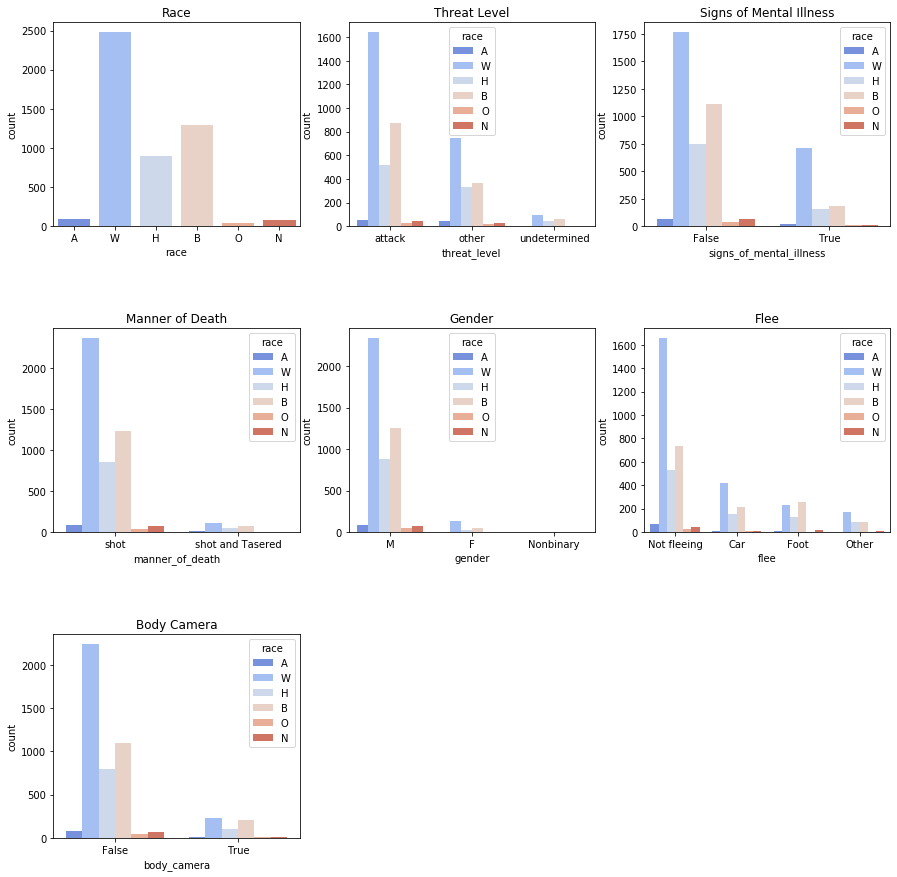

In [31]:
fig = plt.figure(figsize=(15,15))
fig.add_subplot(331) 
sns.countplot(x='race', data=df, palette='coolwarm')
plt.gca().set_title('Race')


fig.add_subplot(332)   
sns.countplot(x="threat_level",hue="race",data=df, palette="coolwarm")
plt.gca().set_title('Threat Level')


fig.add_subplot(333)   
sns.countplot(x="signs_of_mental_illness",hue="race",data=df, palette="coolwarm")
plt.gca().set_title('Signs of Mental Illness')

fig.add_subplot(334)   
sns.countplot(x="manner_of_death",hue="race",data=df, palette="coolwarm")
plt.gca().set_title('Manner of Death')

fig.add_subplot(335)   
sns.countplot(x="gender",hue="race",data=df, palette="coolwarm")
plt.gca().set_title('Gender')

fig.add_subplot(336)  
sns.countplot(x="flee",hue="race",data=df, palette="coolwarm")
plt.gca().set_title('Flee')

fig.add_subplot(337)  
sns.countplot(x="body_camera",hue="race",data=df, palette="coolwarm")
plt.gca().set_title('Body Camera')


plt.subplots_adjust(hspace = .5)


plt.show()



### Wow. For all variables, the racial breakdown mirrors the overall racial distribution. I'm looking for signs that something can 'predict' black death but it's not in the circumstances of the death that I have data for. 

## Anamolies and Outliers - Review boxplots

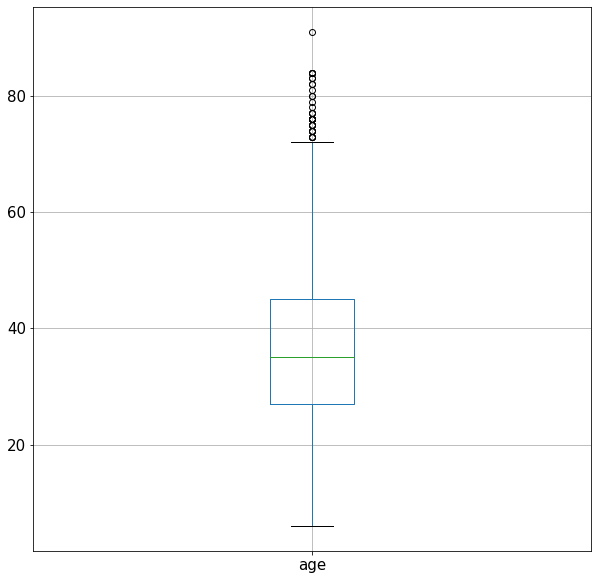

In [32]:
df.boxplot('age', vert=True, fontsize=15, figsize=(10,10))

In [33]:
df.columns

Index(['name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race',
       'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee',
       'body_camera'],
      dtype='object')

In [34]:
df.flee.value_counts()
# HOW TO ENCODE: 0 not fleeing, 1 foot, 2 car, MEAN other

Not fleeing    3078
Car             820
Foot            642
Other           360
Name: flee, dtype: int64

In [35]:
df.threat_level.value_counts()
#HOW TO ENCODE: 2 attack, 1 other, MEAN undetermined??
# OR 1 attack, 0 other, MEAN undetermined

attack          3163
other           1530
undetermined     207
Name: threat_level, dtype: int64

In [36]:
df.manner_of_death.value_counts()
# this really isn't very telling or interesting at all

shot                4652
shot and Tasered     248
Name: manner_of_death, dtype: int64

In [37]:
#example of how to encode i found on stackoverflow

#obj_df["OHC_Code"] = np.where(obj_df["engine_type"].str.contains("ohc"), 1, other=0)
#df['armed']



In [38]:
pd.set_option('display.max_rows',200)
df.armed.value_counts()
#gun, knife, unarmed, undetermined, vehicle, "explosive", "other handheld object", "nonlethal gun" (pellet gun, beanbag gun)
# HOW TO ENCODE? 
# gun 1, explosive 1, vehicle 2, other projectile??, knife 3, other handheld object 3 or 4, nonlethal gun 5 (what about NAILGUN, BOW AND ARROW), other projectile??
# gun is def #1, knife vehicle and explosive hmmm which is 2 and which is 3.

# how about judging by whether the weapon is close range or long range?
# or lethality of weapon:

#IN THIS ORDER??
#gun,
#other explosive, 
#sharp weapon/vehicle, 
#sharp other object, 
#potentially lethal projectile (taser, nailgun, bow and arrow), 
#nonlethal projectile, 
#blunt object.



gun                                 2759
knife                                708
undetermined                         352
unarmed                              347
toy weapon                           172
vehicle                              120
unknown weapon                        66
machete                               39
Taser                                 24
sword                                 22
ax                                    21
baseball bat                          16
gun and knife                         15
hammer                                14
screwdriver                           12
metal pipe                            12
box cutter                            11
hatchet                               11
sharp object                          11
gun and vehicle                       10
gun and car                            9
scissors                               7
crossbow                               6
rock                                   6
blunt object    

### This doesn't really seem appropriate, obviously bc their categorical variables.

In [39]:
#Calculate the correlation coefficients
corr = df.corr()
#plot it in the next line
corr.round(2).style.background_gradient(cmap='coolwarm')

,age,signs_of_mental_illness,body_camera
age,1.000000,0.100000,-0.040000
signs_of_mental_illness,0.100000,1.000000,0.050000
body_camera,-0.040000,0.050000,1.000000


### What about this:
### ● Build data profiles and tables ○ Inferential statistics
### Can I do that with categorical features?

In [40]:
#for my own reference
#this changes figsize
#sns.set(rc={'figure.figsize':(5,5)})

In [41]:
df

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
4896,Terron Jammal Boone,2020-06-17,shot,gun,31.0,M,B,Rosamond,CA,False,attack,Not fleeing,False
4897,TK TK,2020-06-18,shot,gun,38.0,M,W,Westminister,CO,False,other,Not fleeing,False
4898,Andres Guardado,2020-06-18,shot,gun,18.0,M,H,Gardena,CA,False,other,Foot,False


In [46]:
df.date = pd.to_datetime(df.date)

In [47]:
df.date.dtype

dtype('<M8[ns]')

In [49]:
df['day_of_week'] = df.date.dt.dayofweek

In [97]:
pd.DataFrame(df.day_of_week.value_counts()).reset_index().sort_values(by='index')

,index,day_of_week
5,0,671
2,1,736
0,2,758
1,3,736
4,4,675
6,5,649
3,6,675


In [98]:
days = pd.DataFrame(df.day_of_week.value_counts()).reset_index().sort_values(by='index')

([<matplotlib.axis.XTick at 0x7a9aa667f490>,
 <a list of 7 Text xticklabel objects>)

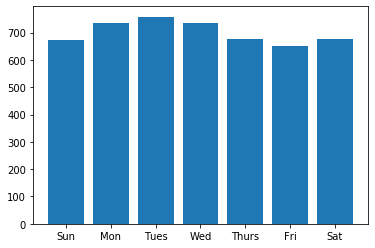

In [99]:
plt.bar(np.arange(7), days.day_of_week)
plt.xticks(np.arange(7-.5), ['Sun','Mon','Tues','Wed','Thurs','Fri','Sat'])


In [96]:
pd.DataFrame(df.day_of_week.value_counts()).reset_index().sort_values(by='index')

,index,day_of_week
5,0,671
2,1,736
0,2,758
1,3,736
4,4,675
6,5,649
3,6,675


In [55]:
np.arange(7)

array([0, 1, 2, 3, 4, 5, 6])

In [68]:
plt.xticks?